In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.learning_curve import learning_curve
import matplotlib.patches as mpatches
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pd.options.mode.chained_assignment = None
from sklearn import preprocessing


%matplotlib inline

In [3]:
df = pd.read_csv("3355.csv")

//anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (11,14,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [33]:
print df.columns.values.tolist()

['CASENUM', 'YEAROB1', 'MNTHOB1', 'DAYOB1', 'SEX1', 'RACE1', 'ETHNIC1', 'YEARAD', 'MONTHAD', 'DAYAD', 'ADTYP', 'OFFSTAT', 'OFFLIT', 'OFFNCIC', 'OFFDOC', 'TOTYEAR', 'TOTMONTH', 'TOTDAY', 'YEARRLS', 'MONTHRLS', 'DAYRLS', 'RELTYP', 'NFRCTNS', 'HIV', 'DRUGAB', 'ALCABUS', 'DRUGTRT', 'ALCTRT', 'SEXTRT', 'EDUCAT', 'VOCAT', 'YEARSCJ', 'MONTHSCJ', 'DAYSCJ', 'STATE', 'STDATAA', 'STDATAB', 'STDATAC', 'WEIGHT', 'SMPOFF13', 'SMPOFF26', 'MXOF', 'DOFD', 'DFM', 'DDMV', 'DFIR', 'DCDV', 'STATERAP', 'FBIRAP', 'DEAD', 'YEAROB2', 'MNTHOB2', 'DAYOB2', 'SEX2', 'RACE2', 'ETHNIC2', 'WGT', 'HGT', 'HAIR', 'EYE', 'POB', 'FBI001', 'A001MO', 'A001DA', 'A001YR', 'A001ST', 'A001CNT', 'A001OFF1', 'A001OFD1', 'A001FM1', 'A001DSP1', 'A001DMV1', 'A001FIR1', 'A001CDV1', 'A001OFF2', 'A001OFD2', 'A001FM2', 'A001DSP2', 'A001DMV2', 'A001FIR2', 'A001CDV2', 'A001OFF3', 'A001OFD3', 'A001FM3', 'A001DSP3', 'A001DMV3', 'A001FIR3', 'A001CDV3', 'J001MO', 'J001DA', 'J001YR', 'J001CNT', 'J001OFF1', 'J001OFD1', 'J001FM1', 'J001CNV1', 'J

In [4]:
cols = df[['CASENUM', 'YEAROB1', 'MNTHOB1', 'DAYOB1', 'SEX1', 'RACE1', 'ETHNIC1', 'YEARAD', 'MONTHAD', 'DAYAD', 'ADTYP', 'OFFSTAT', 'OFFLIT', 'OFFNCIC', 'OFFDOC', 'TOTYEAR', 'TOTMONTH', 'TOTDAY', 'YEARRLS', 'MONTHRLS', 'DAYRLS', 'RELTYP', 'NFRCTNS', 'HIV', 'DRUGAB', 'ALCABUS', 'DRUGTRT', 'ALCTRT', 'SEXTRT', 'EDUCAT', 'VOCAT', 'YEARSCJ', 'MONTHSCJ', 'DAYSCJ', 'STATE', 'STDATAA', 'STDATAB', 'STDATAC', 'WEIGHT', 'SMPOFF13', 'SMPOFF26', 'MXOF', 'DOFD', 'DFM', 'DDMV', 'DFIR', 'DCDV', 'STATERAP', 'FBIRAP', 'DEAD', 'YEAROB2', 'MNTHOB2', 'DAYOB2', 'SEX2', 'RACE2', 'ETHNIC2', 'WGT', 'HGT', 'HAIR', 'EYE', 'POB', 'FBI001', 'A001MO', 'A001DA', 'A001YR', 'A001ST', 'A001CNT', 'A001OFF1', 'A001OFD1', 'A001FM1', 'A001DSP1', 'A001DMV1', 'A001FIR1', 'A001CDV1', 'A001OFF2', 'A001OFD2', 'A001FM2', 'A001DSP2', 'A001DMV2', 'A001FIR2', 'A001CDV2', 'A001OFF3', 'A001OFD3', 'A001FM3', 'A001DSP3', 'A001DMV3', 'A001FIR3', 'A001CDV3', 
           'J001MO', 'J001DA', 'J001YR', 'J001CNT', 'J001OFF1', 'J001OFD1', 'J001FM1', 'J001CNV1', 'J001CNF1', 'J001PJP1', 'J001PMX1', 'J001PRB1', 'J001DMV1', 'J001FIR1', 'J001CDV1', 'J001OFF2', 'J001OFD2', 'J001FM2', 'J001CNV2', 'J001CNF2', 'J001PJP2', 'J001PMX2', 'J001PRB2', 'J001DMV2', 'J001FIR2', 'J001CDV2', 'J001OFF3', 'J001OFD3', 'J001FM3', 'J001CNV3', 'J001CNF3', 'J001PJP3', 'J001PMX3', 'J001PRB3', 'J001DMV3', 'J001FIR3', 'J001CDV3',
           'SMPOFF5', 'SEX', 'RACE', 'RACE4', 'ETHNIC', 'RELAGE', 'RLAGE', 'ANALYSIS', 'SNTLN', 'TMSRV', 'TMSRVC', 'PCTSRV', 'PRIR', 'PRIRD', 'PRIRCAT', 'PPRID', 'POTST', 'POTSTD', 'REARR', 'REARRD', 'RCNVCT', 'RCNVCTD', 'RCNFIN', 'RCNFIND', 'RCNFITV', 'RPRS', 'RPRSD', 'RPRSITV', 'ROTST', 'ROTSTD']]

In [5]:
cols = df[['ADTYP', 'RELTYP', 'NFRCTNS', 'DRUGTRT', 'ALCTRT', 'SEXTRT', 'EDUCAT', 'VOCAT', 'WEIGHT',  'A001MO', 'A001DA', 'A001YR', 'A001ST', 'A001CNT', 'A001OFF1', 'A001OFD1', 'A001FM1', 'A001DSP1', 'A001DMV1', 'A001FIR1', 'A001CDV1', 'A001OFF2', 'A001OFD2', 'A001FM2', 'A001DSP2', 'A001DMV2', 'A001FIR2', 'A001CDV2', 'A001OFF3', 'A001OFD3', 'A001FM3', 'A001DSP3', 'A001DMV3', 'A001FIR3', 'A001CDV3', 'J001MO', 'J001DA', 'J001YR', 'J001CNT', 'J001OFF1', 'J001OFD1', 'J001FM1', 'J001CNV1', 'J001CNF1', 'J001PJP1', 'J001PMX1', 'J001PRB1', 'J001DMV1', 'J001FIR1', 'J001CDV1', 'J001OFF2', 'J001OFD2', 'J001FM2', 'J001CNV2', 'J001CNF2', 'J001PJP2', 'J001PMX2', 'J001PRB2', 'J001DMV2', 'J001FIR2', 'J001CDV2', 'J001OFF3', 'J001OFD3', 'J001FM3', 'J001CNV3', 'J001CNF3', 'J001PJP3', 'J001PMX3', 'J001PRB3', 'J001DMV3', 'J001FIR3', 'J001CDV3','SMPOFF5', 'SEX', 'RACE', 'ETHNIC', 'RELAGE', 'RLAGE', 'SNTLN', 'TMSRV', 'TMSRVC', 'PCTSRV', 'PRIR', 'PRIRD', 'PRIRCAT', 'PPRID', 'POTST', 'POTSTD', 'REARR', 'REARRD','ROTST', 'ROTSTD']]

In [92]:
for x in cols.columns.values.tolist():
    print x, df[x].value_counts()

CASENUM 667     15
72      15
561     15
529     15
497     15
465     15
433     15
401     15
369     15
337     15
305     15
25      15
273     15
241     15
209     15
57      15
177     15
145     15
113     15
89      15
81      15
49      15
121     15
8       15
17      15
153     15
40      15
593     15
625     15
657     15
        ..
5164     1
4248     1
3119     1
3151     1
3055     1
5228     1
6265     1
3183     1
5260     1
4216     1
3215     1
5132     1
7149     1
4972     1
5036     1
7021     1
4312     1
2927     1
5004     1
7053     1
2959     1
7085     1
5100     1
6329     1
2991     1
5068     1
7117     1
4280     1
3023     1
4014     1
dtype: int64
YEAROB1 1964    1730
1962    1707
1965    1688
1963    1648
1960    1646
1961    1642
1969    1622
1970    1603
1967    1601
1966    1600
1971    1598
1968    1537
1959    1518
1958    1447
1972    1400
1957    1372
1956    1231
1973    1096
1955    1067
1954    1034
1953     907
1952     817
1974     772
1

In [138]:
cols.iloc[[1]].T[:50]

,1
ADTYP,COURT COMMITMENT
RELTYP,OTHER CONDITIONAL RELEASE
NFRCTNS,NO RECORD
DRUGTRT,UNKNOWN
ALCTRT,UNKNOWN
SEXTRT,UNKNOWN
EDUCAT,UNKNOWN
VOCAT,UNKNOWN
WEIGHT,10.77778
A001MO,JULY


In [139]:
cols.iloc[[1]].T[51:]

,1
J001OFD2,NOT APPLICABLE
J001FM2,NOT APPLICABLE
J001CNV2,NOT APPLICABLE
J001CNF2,NOT APPLICABLE
J001PJP2,NOT APPLICABLE
J001PMX2,9.98999e+07
J001PRB2,9.98999e+07
J001DMV2,NOT APPLICABLE
J001FIR2,NOT APPLICABLE
J001CDV2,NOT APPLICABLE


In [141]:
cols.J001CNT.value_counts()

1     13709
98    12834
2      5173
3      2168
4      1579
99      821
5       660
6       470
7       252
9       247
8       227
10      118
12       84
11       65
16       51
13       32
15       25
14       25
20       14
25       11
17       11
18        8
22        6
19        6
27        4
24        4
21        4
36        3
48        2
30        2
97        2
70        1
37        1
49        1
56        1
45        1
28        1
31        1
dtype: int64

In [142]:
cols.A001CNT.value_counts()

1     26193
2      7033
3      2486
99     1229
4      1011
5       366
6       131
7        74
8        30
9        18
10       14
11        9
12        7
13        5
14        5
18        3
19        2
61        1
22        1
45        1
15        1
49        1
51        1
20        1
43        1
dtype: int64

### Condensing dataframe down to important factors to explore

In [6]:
df2 = df[[
'CASENUM','YEAROB1','SEX1','RACE1','ETHNIC1', 'ADTYP',
'RELTYP','NFRCTNS','DRUGAB','DRUGTRT','ALCTRT',
'SEXTRT','EDUCAT','VOCAT','STATE','DFM','DDMV','DFIR','DCDV','DEAD',
'SMPOFF5','RELAGE','RLAGE','SNTLN','TMSRV','PRIR','PPRID','POTST',
'A001CNT', 'A001YR','A001MO','A001ST','A001FM1','A001DSP1','A001DMV1','A001FIR1','A001CDV1',
'REARR','RCNVCT','RCNFIN','RPRS','RPRSITV','ROTST', 'PCTSRV']]
df2

,CASENUM,YEAROB1,SEX1,RACE1,ETHNIC1,ADTYP,RELTYP,NFRCTNS,DRUGAB,DRUGTRT,...,A001DMV1,A001FIR1,A001CDV1,REARR,RCNVCT,RCNFIN,RPRS,RPRSITV,ROTST,PCTSRV
0,1,1932,MALE,WHITE,HISPANIC,"MANDATORY PAROLE RELEASE REVOCATION, NO NEW SE...",OTHER UNCONDITIONAL RELEASE,INMATE HAS RECORD,INMATE IS A DRUG ABUSER,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,4,3,3,1,NOT APPLICABLE,0,1.714000e+01
1,2,1929,MALE,WHITE,HISPANIC,COURT COMMITMENT,OTHER CONDITIONAL RELEASE,NO RECORD,INMATE IS A DRUG ABUSER,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,1,1,1,0,NOT APPLICABLE,0,5.375000e+01
2,3,1934,MALE,WHITE,HISPANIC,COURT COMMITMENT,PAROLE BOARD DECISION-SERVED NO MINIMUM,INMATE HAS RECORD,NOT A DRUG ABUSER,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,1,1,1,1,NOT APPLICABLE,0,3.743000e+01
3,4,1931,MALE,BLACK,NONHISPANIC,"MANDATORY PAROLE RELEASE REVOCATION, NO NEW SE...",OTHER UNCONDITIONAL RELEASE,NO RECORD,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,888,888,888,888,NOT APPLICABLE,888,9.989990e+05
4,5,1942,MALE,WHITE,NONHISPANIC,"MANDATORY PAROLE RELEASE REVOCATION, NO NEW SE...",EXPIRATION OF SENTENCE,NO RECORD,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,1,0,0,0,NOT APPLICABLE,0,4.300000e-01
5,6,1936,MALE,WHITE,NONHISPANIC,"ESCAPEE-AWOL RETURNED, NO NEW SENTENCE","RELEASE TO CUSTODY, DETAINER, OR WARRANT",NO RECORD,INMATE IS A DRUG ABUSER,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,1,888,1,888,NOT APPLICABLE,888,9.989990e+05
6,7,1947,FEMALE,WHITE,HISPANIC,COURT COMMITMENT,"RELEASE TO CUSTODY, DETAINER, OR WARRANT",NO RECORD,INMATE IS A DRUG ABUSER,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,3,888,0,888,NOT APPLICABLE,888,4.160000e+08
7,8,1944,MALE,WHITE,NONHISPANIC,"MANDATORY PAROLE RELEASE REVOCATION, NO NEW SE...",MANDATORY PAROLE RELEASE,INMATE HAS RECORD,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,888,888,888,888,NOT APPLICABLE,888,9.989990e+05
8,9,1942,MALE,AMERICAN INDIAN/ALEUTIAN,NONHISPANIC,COURT COMMITMENT,EXPIRATION OF SENTENCE,INMATE HAS RECORD,NOT A DRUG ABUSER,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,3,1,1,0,NOT APPLICABLE,0,9.667000e+01
9,10,1939,MALE,WHITE,HISPANIC,"PROBATION REVOCATION, NEW SENTENCE",OTHER CONDITIONAL RELEASE,INMATE HAS RECORD,INMATE IS A DRUG ABUSER,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,3,1,1,1,NOT APPLICABLE,0,5.996000e+01


###Replace unknown or not applicable data with np.nan (for now) for numerical features

In [7]:
df2['YEAROB1'] = df2['YEAROB1'].replace(9999,np.nan)
df2['A001YR'] = df2['A001YR'].replace(9999,np.nan)
df2['A001YR'] = df2['A001YR'].replace(9998,np.nan)
df2['REARR'] = df2['REARR'].replace(888,np.nan)
df2['ROTST'] = df2['ROTST'].replace(888,np.nan)
df2['PRIR'] = df2['PRIR'].replace(888,np.nan)
df2['POTST'] = df2['POTST'].replace(888,np.nan)
df2['RELAGE'] = df2['RELAGE'].replace(99999999.99,np.nan)
df2['RELAGE'] = df2['RELAGE'].replace(100000000.00,np.nan)
df2['TMSRV'] = df2['TMSRV'].replace(99899899.88,np.nan)
df2['TMSRV'] = df2['TMSRV'].replace(998999.00,np.nan)

###Adding calculated features

In [8]:
df2['AGE_FIRST_OFF'] = df2.A001YR - df2.YEAROB1
df2['AGE_FIRST_OFF'][df2['AGE_FIRST_OFF'] < 16] = np.nan
#df2['AVG_YRLY_ARR'] = 0
df2['TOT_PRARR'] = (df2['PRIR'] + df2['POTST'])
df2['CAREER_LEN'] = (1994-df2['A001YR'])
df2['SNTLN_YRS'] = df2.SNTLN/12
df2['TOTREARR'] = df2.REARR + df2.ROTST
df2['RESP'] = 0
df2['RESP'][df2['TOTREARR'] > 0] = 1

#consequence factor

In [172]:
df2.TOT_PRARR.value_counts()

0      3971
1      3136
2      3122
3      2607
4      2504
5      2176
6      1899
7      1674
8      1445
9      1228
10     1148
11     1027
12      846
13      712
14      669
15      577
16      560
17      457
18      425
20      347
19      342
21      267
24      229
22      226
23      189
26      174
25      173
28      138
27      134
29      110
       ... 
98        2
89        2
88        2
87        2
85        2
84        2
76        2
72        2
77        2
74        2
73        2
61        2
80        1
120       1
118       1
116       1
113       1
110       1
108       1
103       1
94        1
96        1
81        1
90        1
75        1
123       1
86        1
78        1
79        1
177       1
dtype: int64

In [9]:
#When finished, count all nans for relevant features
len(df2.AGE_FIRST_OFF) - df2['AGE_FIRST_OFF'].count()

2116

In [10]:
treatments = ['DRUGTRT', 'ALCTRT', 'SEXTRT', 'EDUCAT', 'VOCAT']

for x in treatments:
    df2[x] = df2[x].replace('UNKNOWN',0)
    df2[x] = df2[x].replace('INMATE DID NOT PARTICIPATE',0)
    df2[x] = df2[x].replace('INMATE PARTICIPATED BUT UNKNOWN IF COMPLETED',1)
    df2[x] = df2[x].replace('INMATE PARTICIPATED IN PROGRAM & COMPLETED IT',1)
    df2[x] = df2[x].replace('INMATE PARTICIPATED BUT DID NOT COMPLETE',1)


df2['TREATMENT'] = df2.DRUGTRT + df2.ALCTRT + df2.SEXTRT + df2.EDUCAT + df2.VOCAT
df2['TREATMENT'][df2['TREATMENT'] > 0] = 1
df2.TREATMENT.value_counts()

0    30156
1     8468
dtype: int64

###Exploratory data analysis

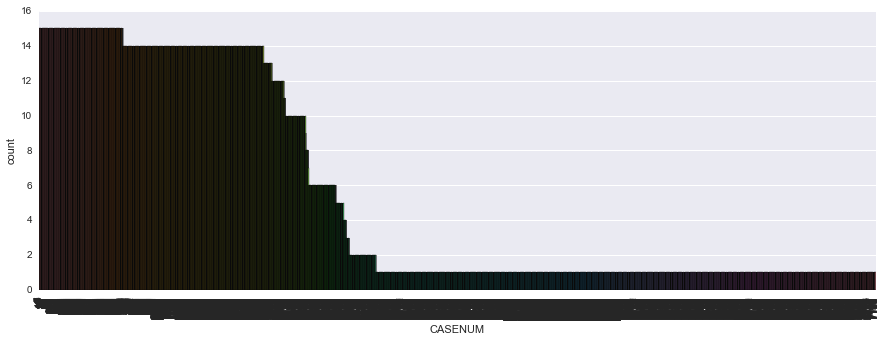

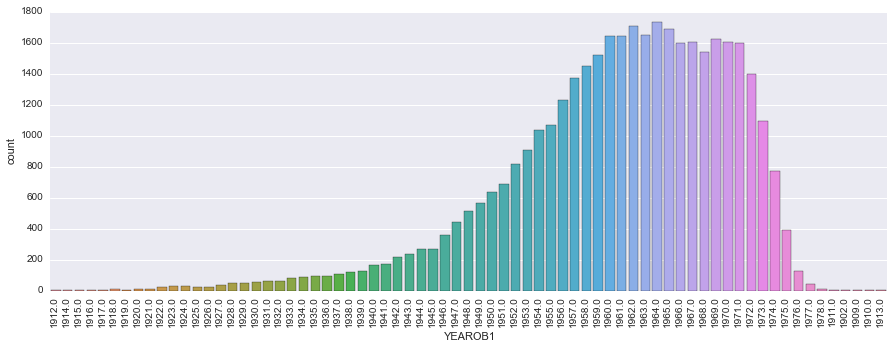

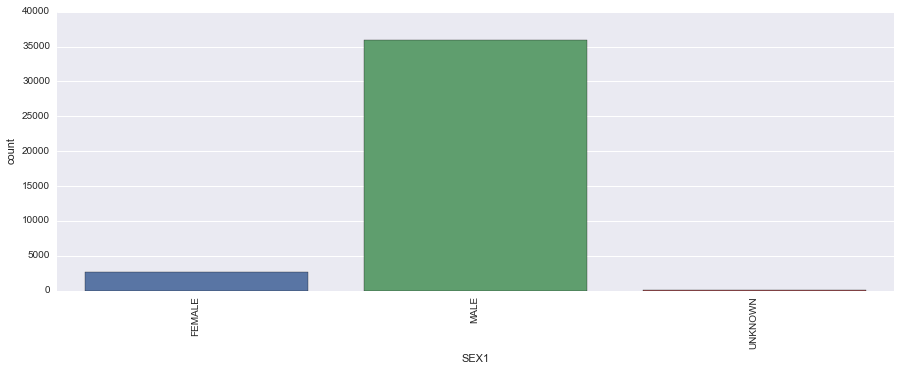

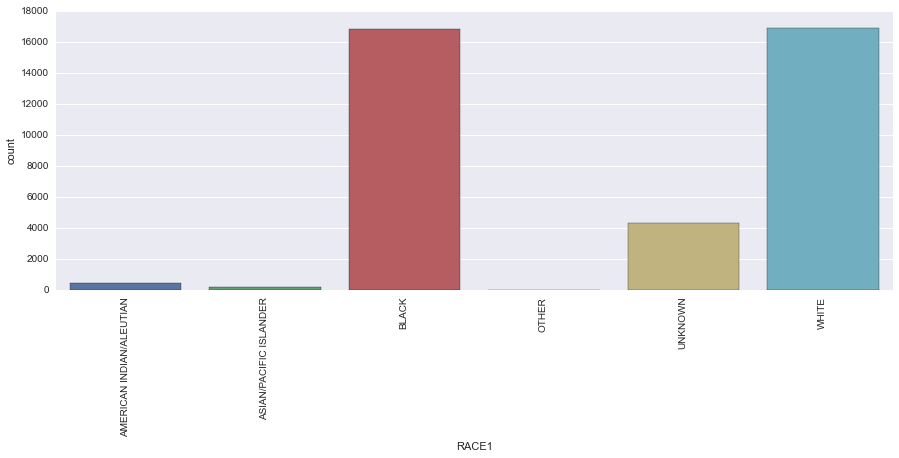

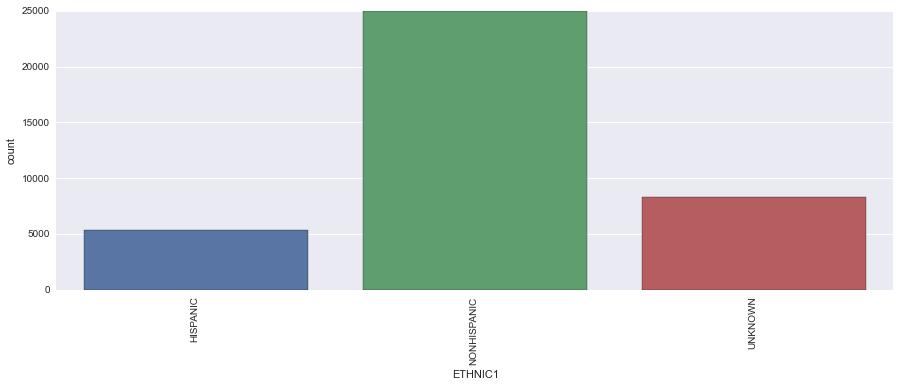

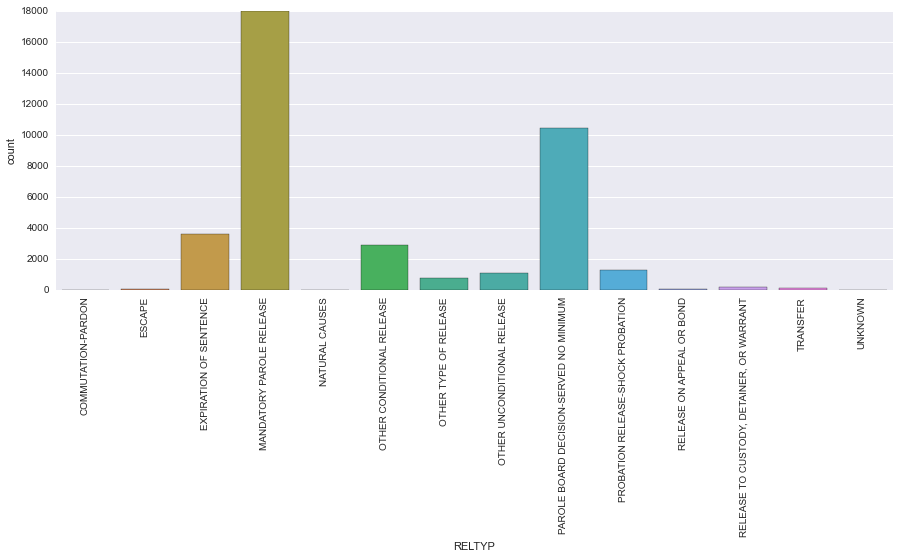

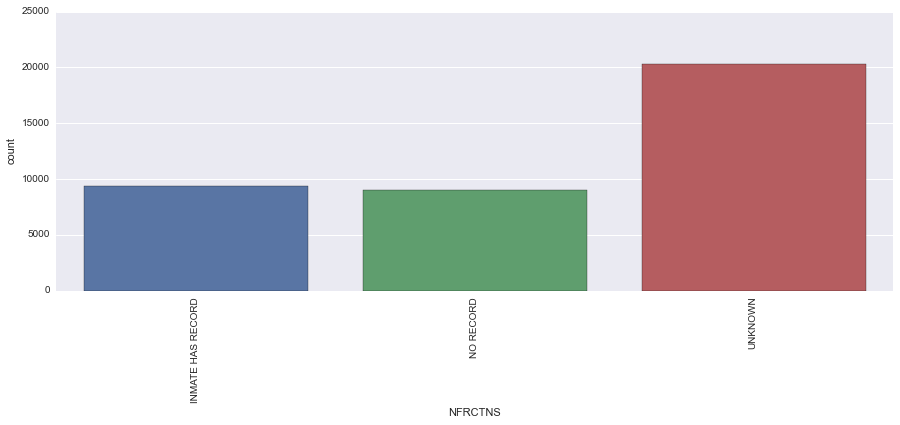

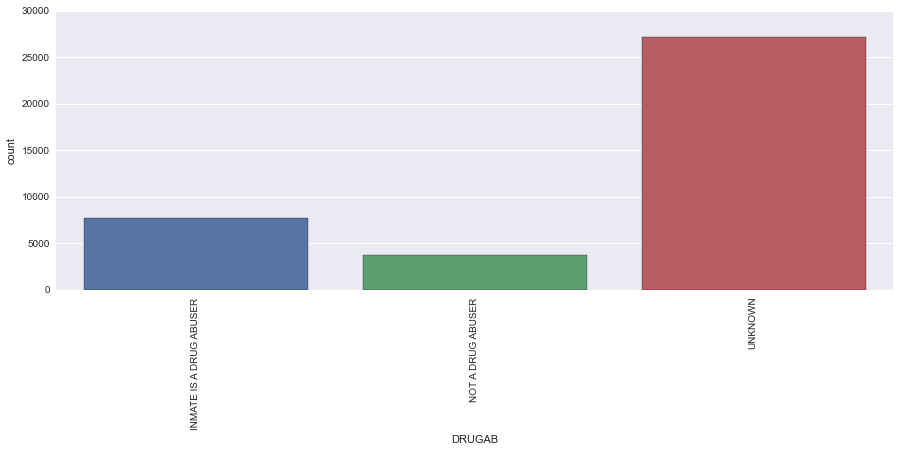

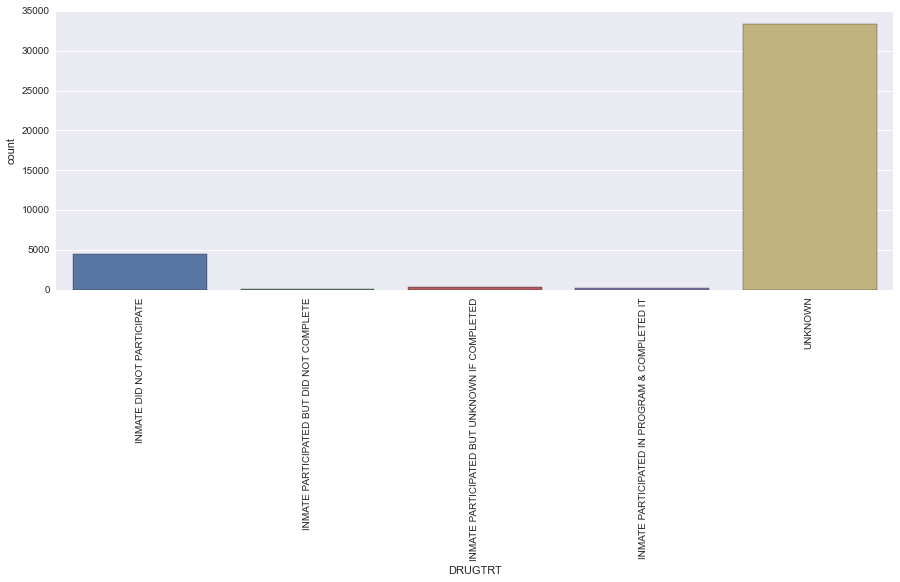

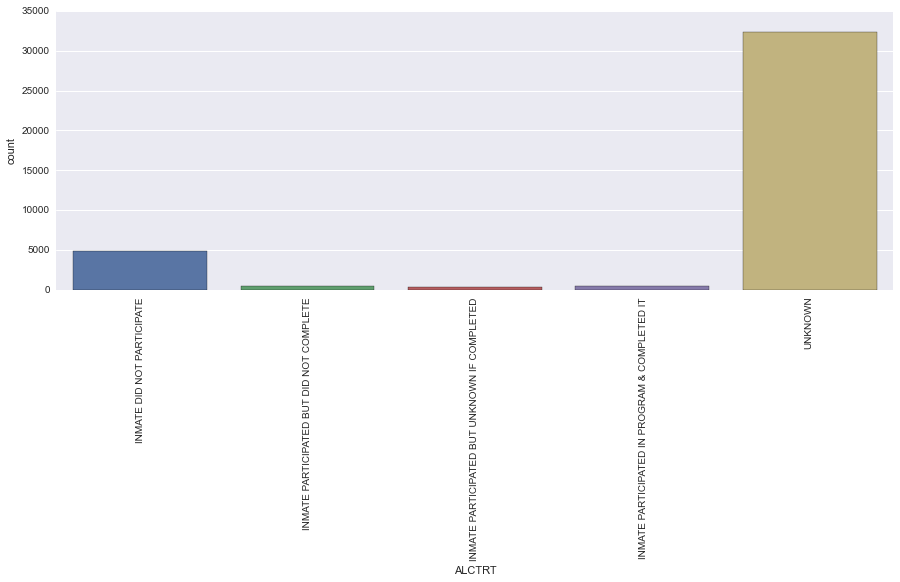

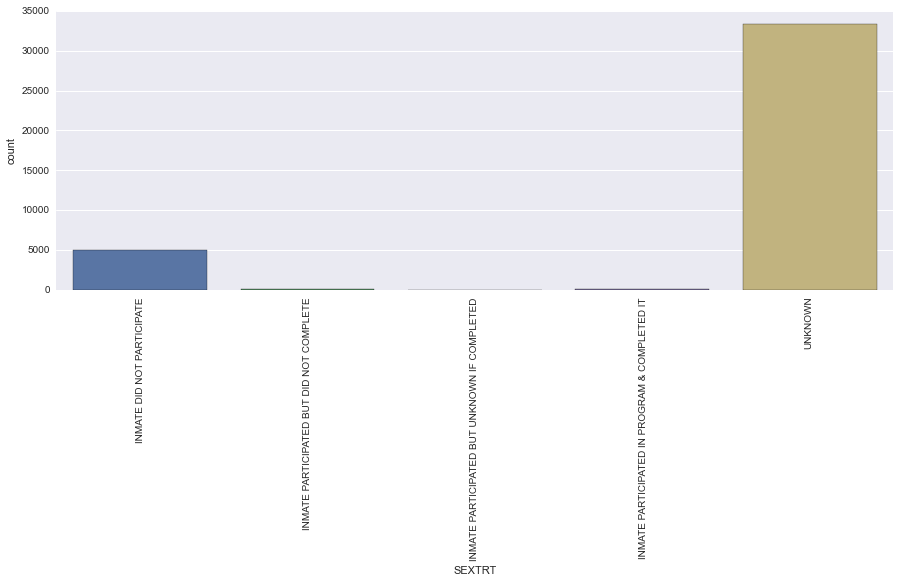

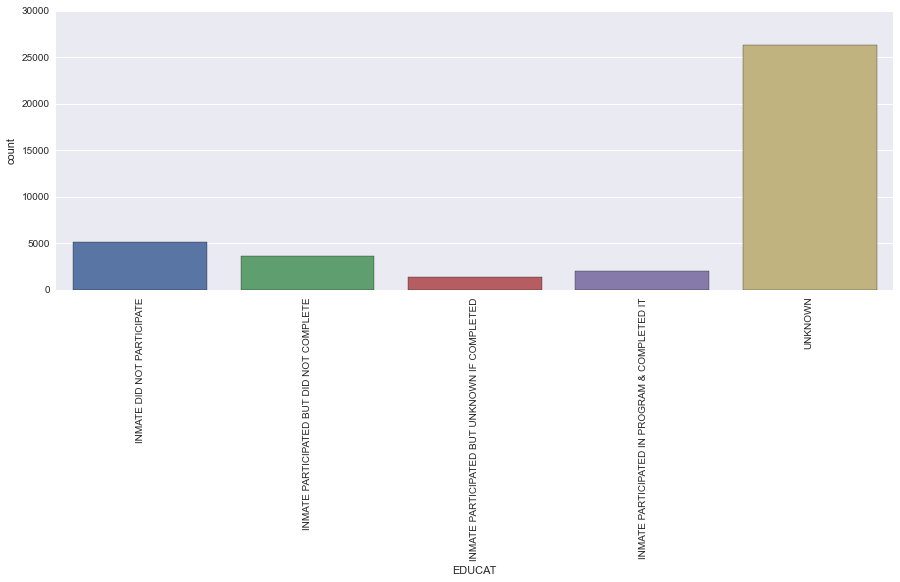

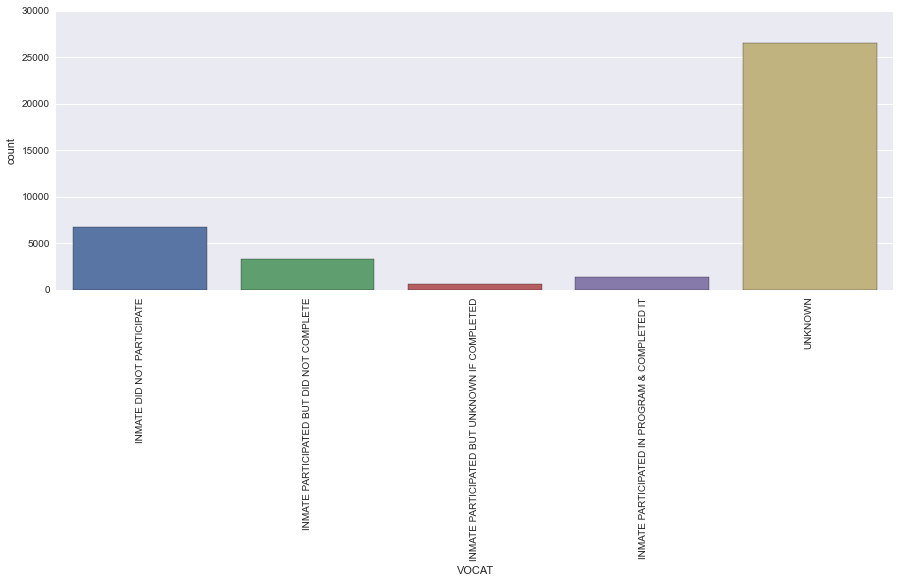

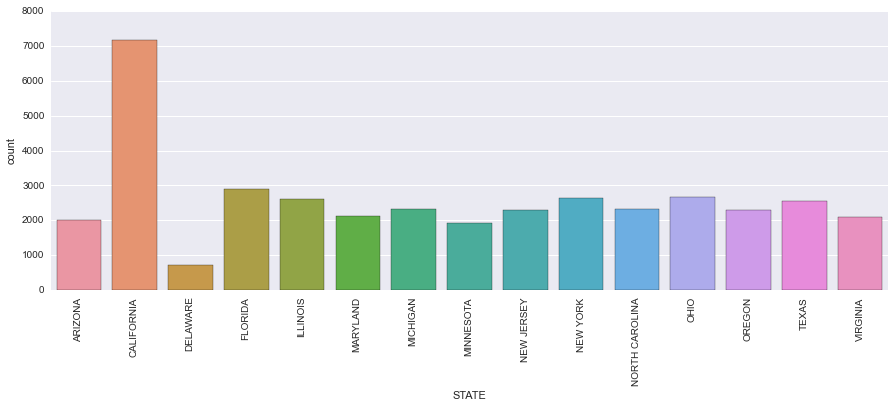

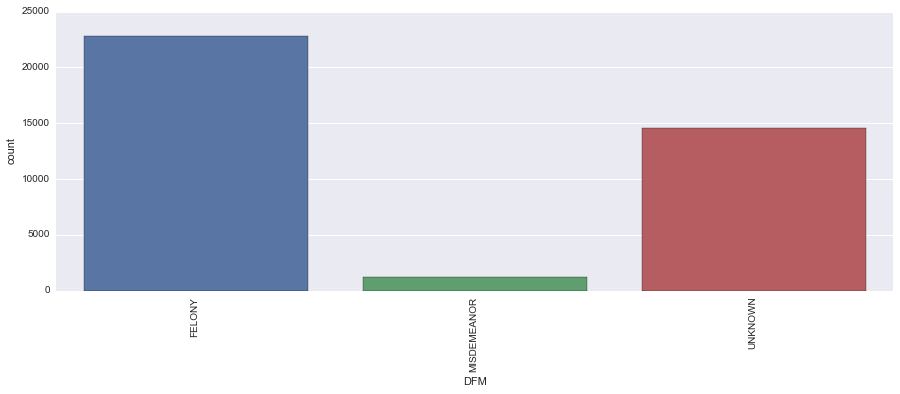

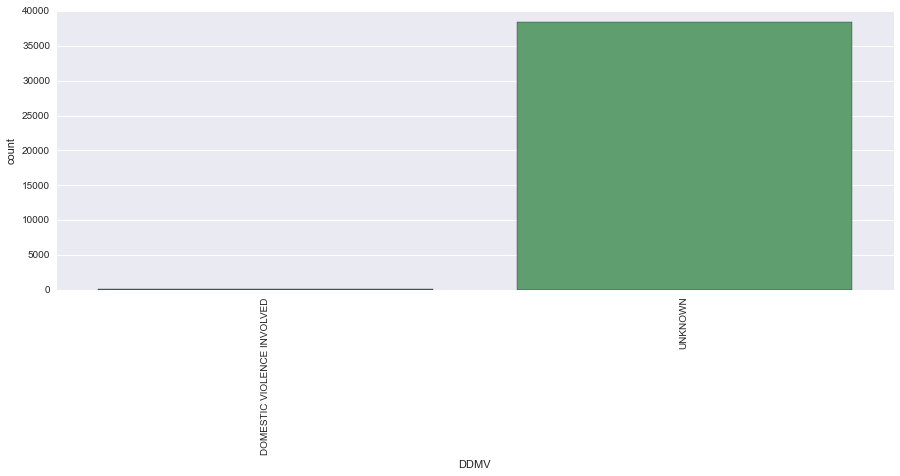

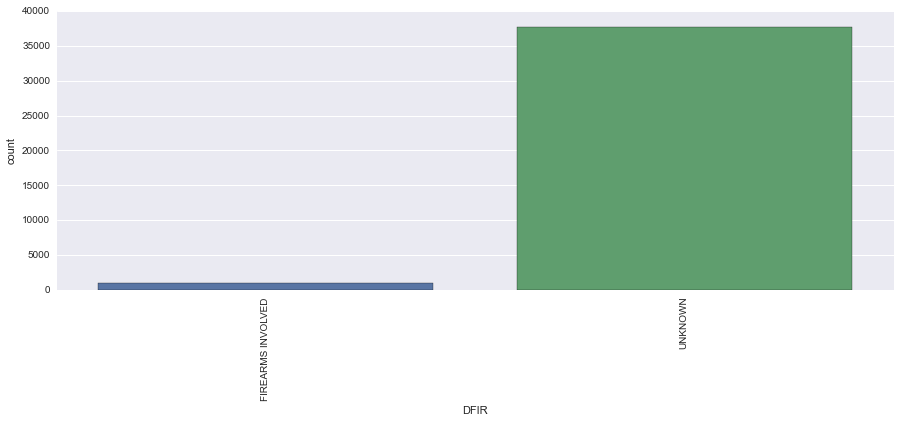

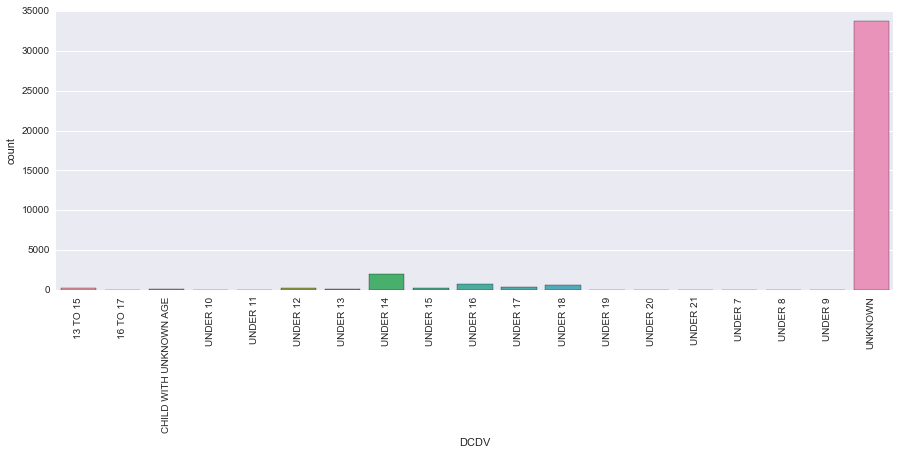

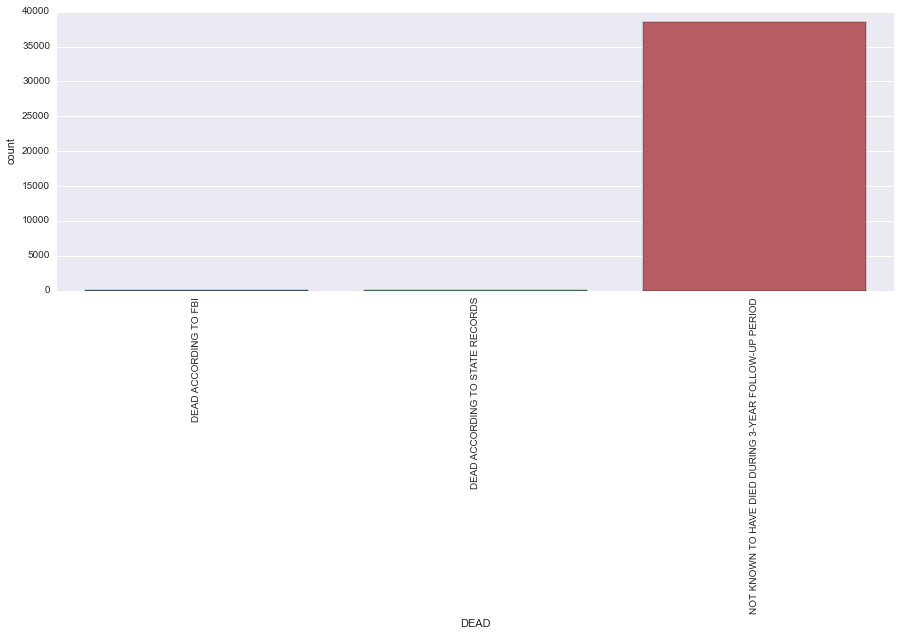

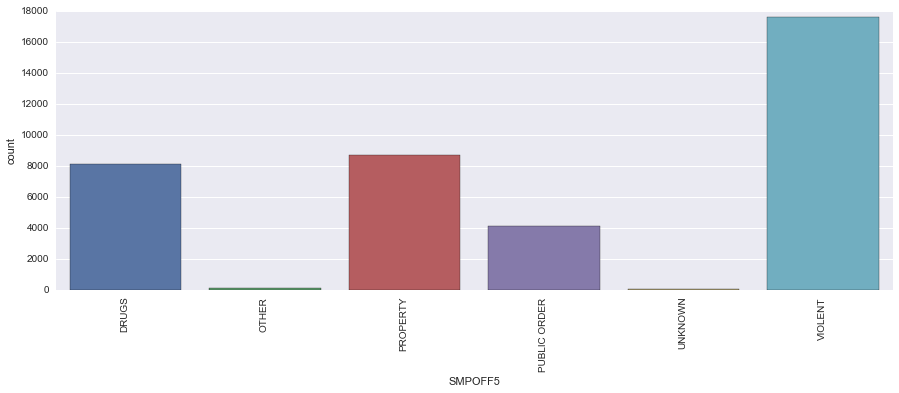

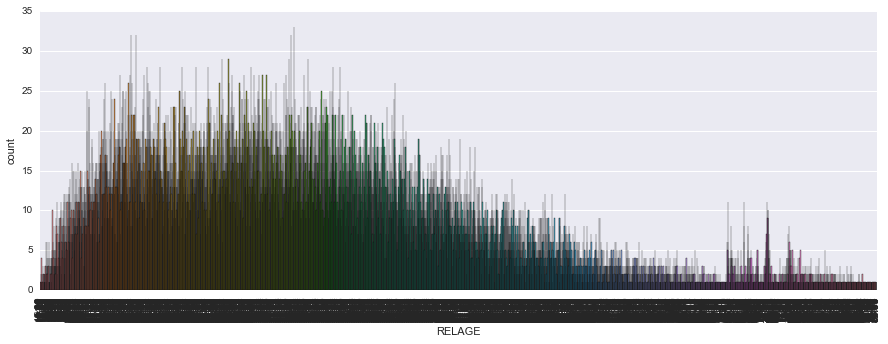

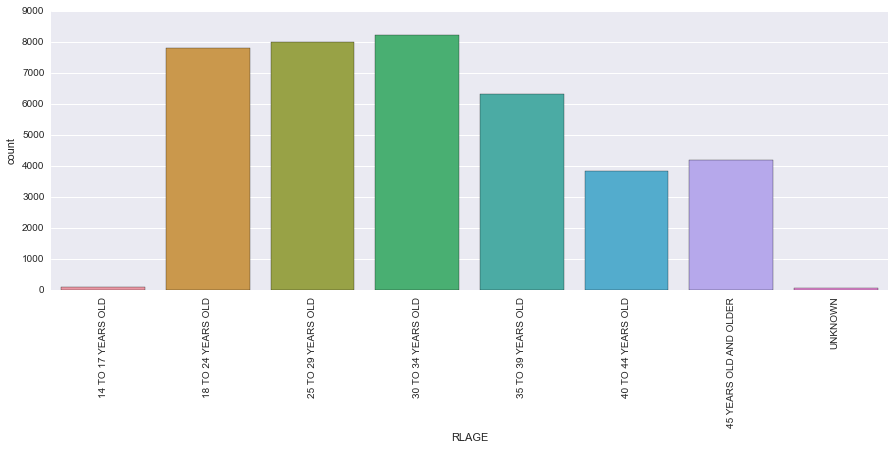

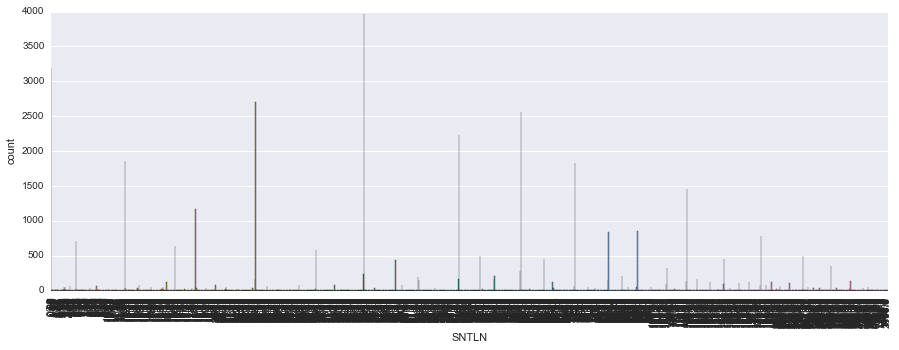

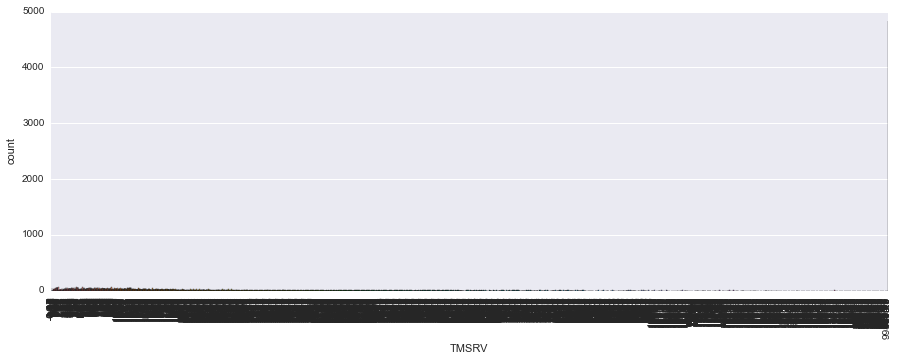

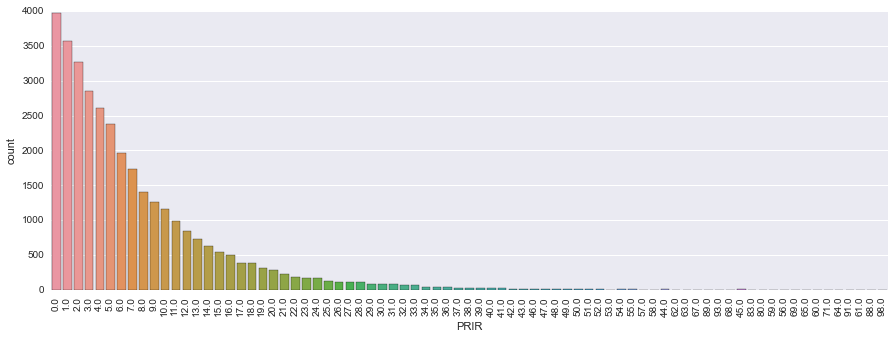

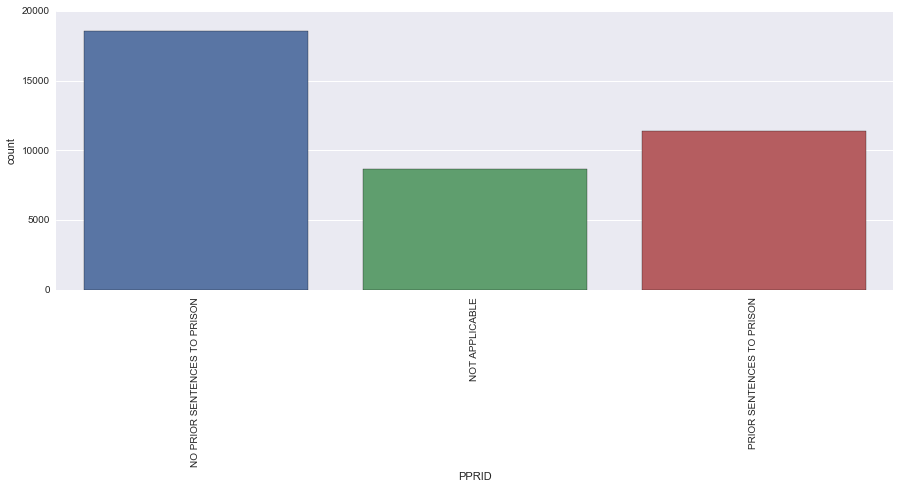

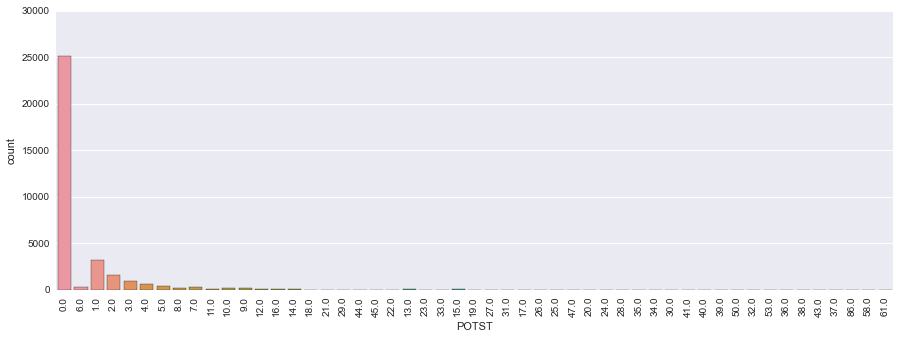

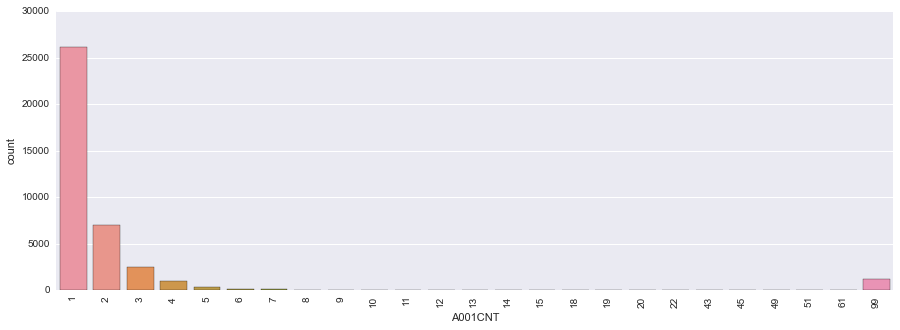

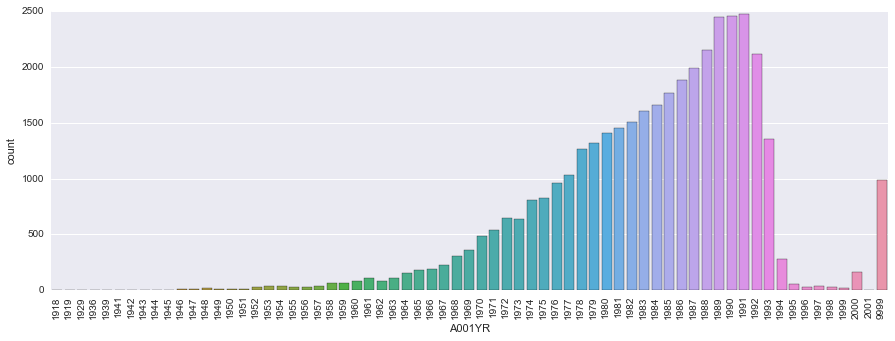

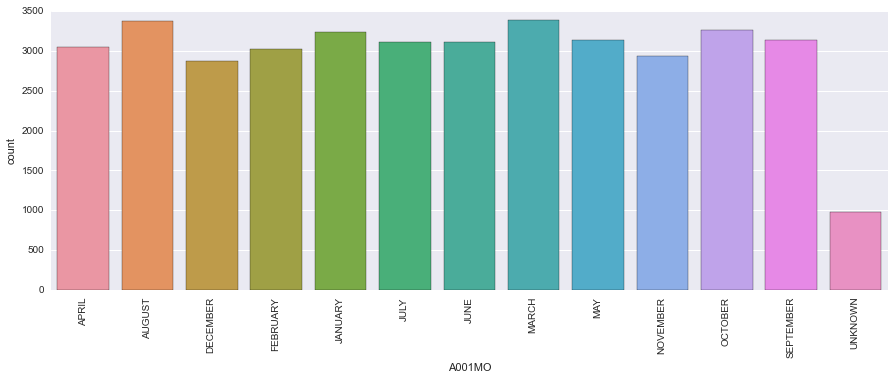

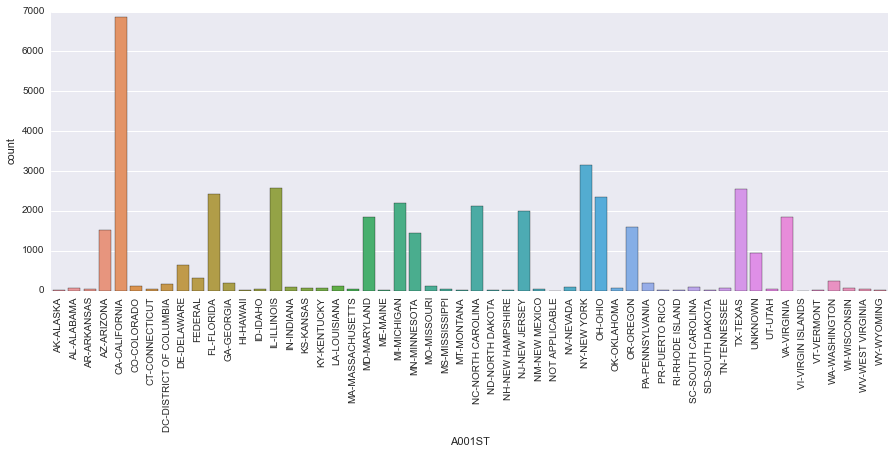

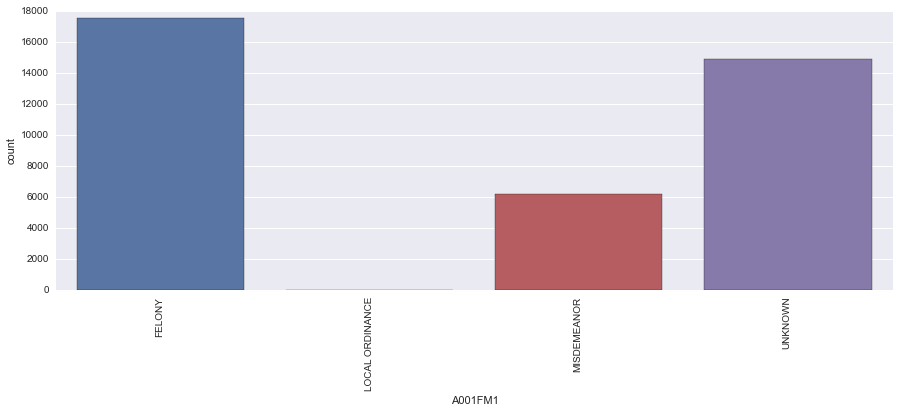

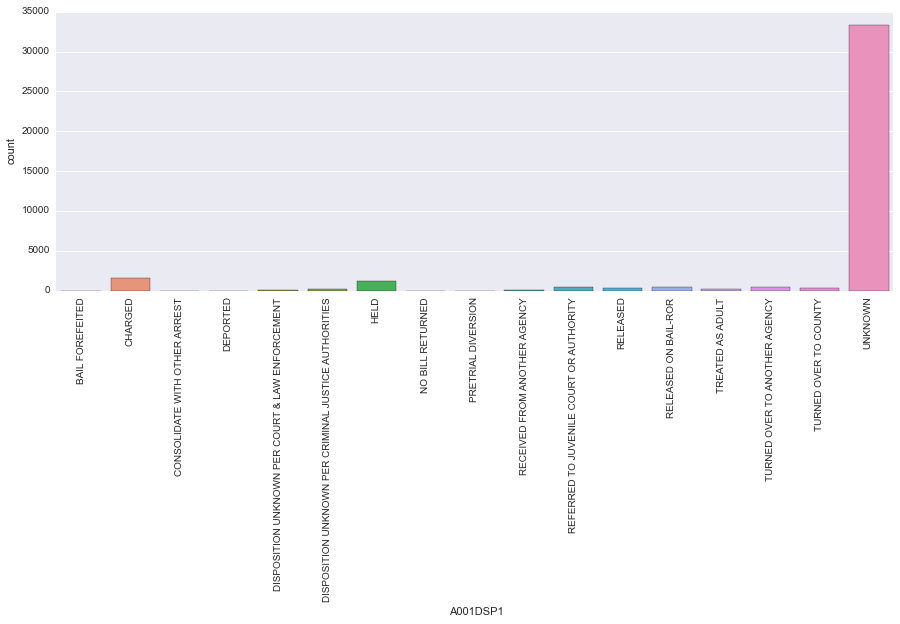

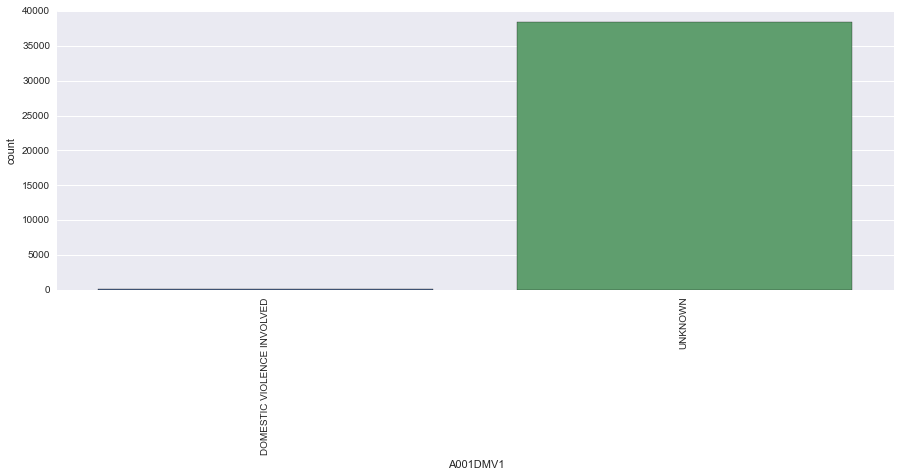

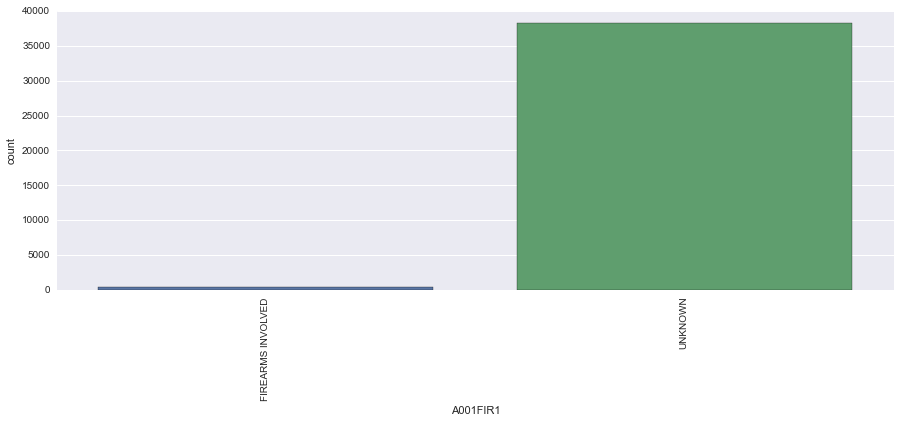

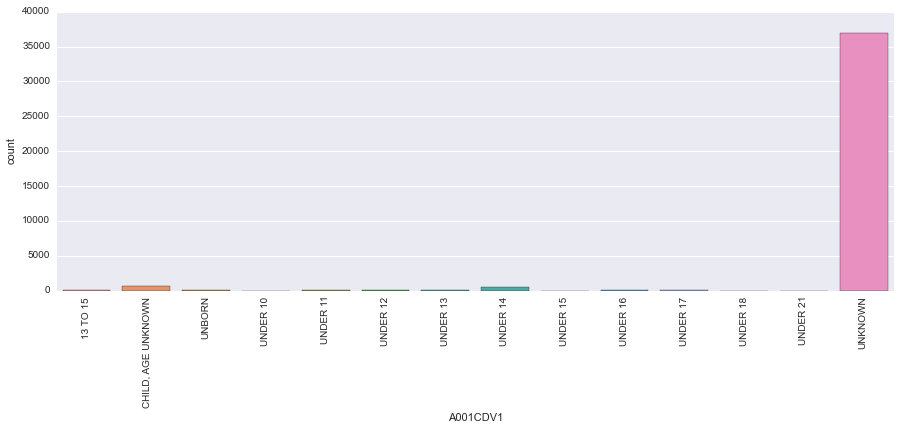

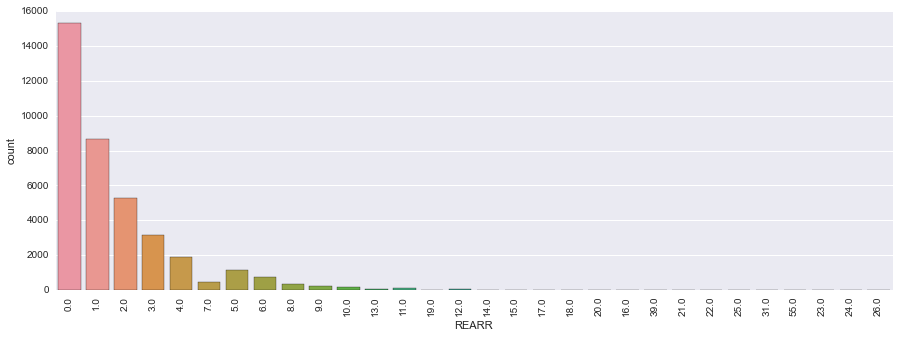

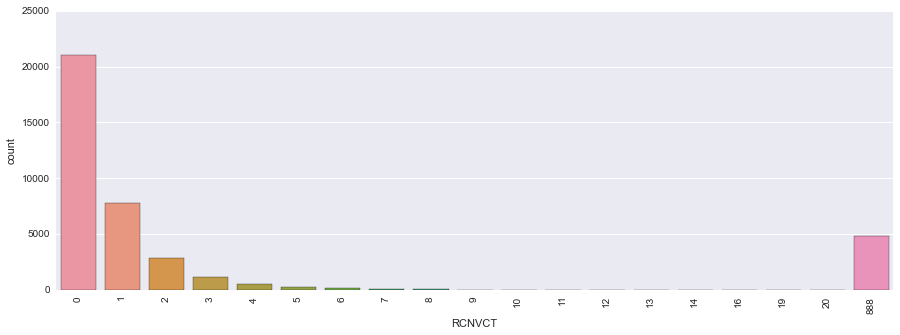

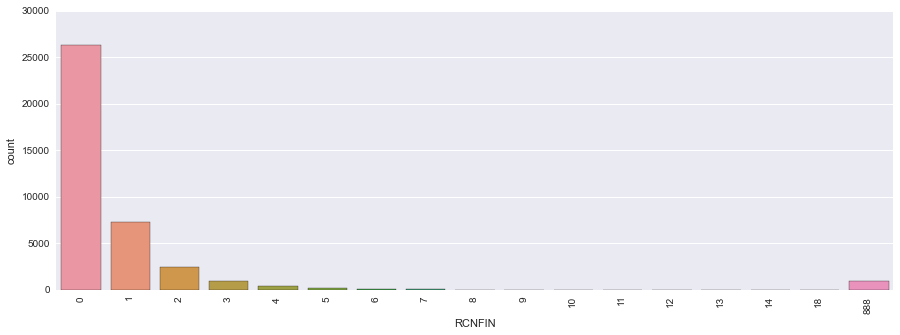

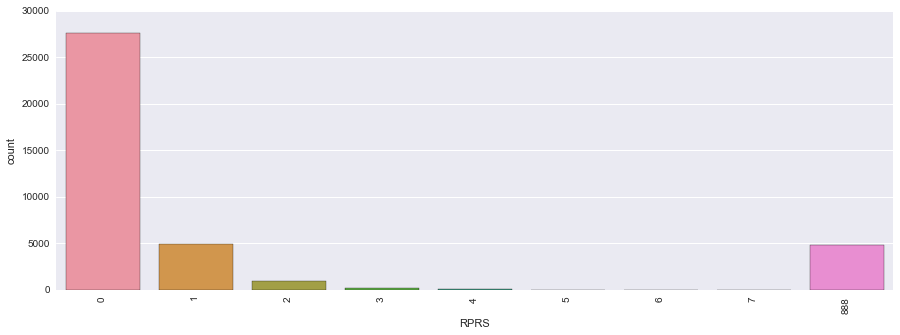

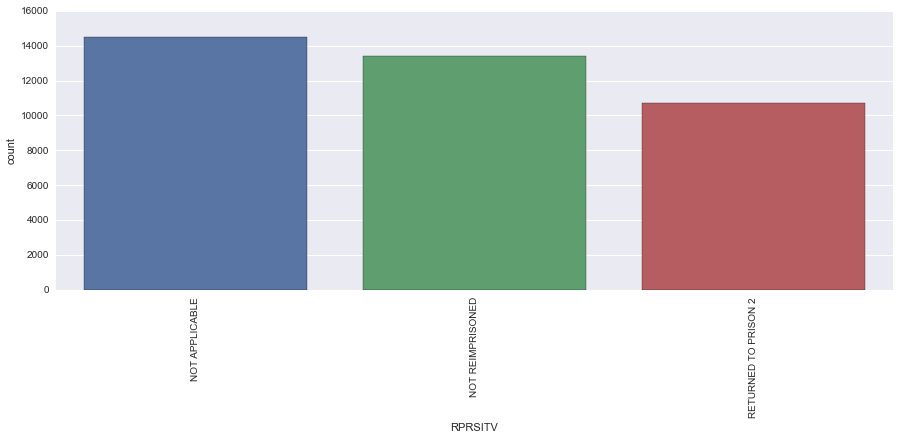

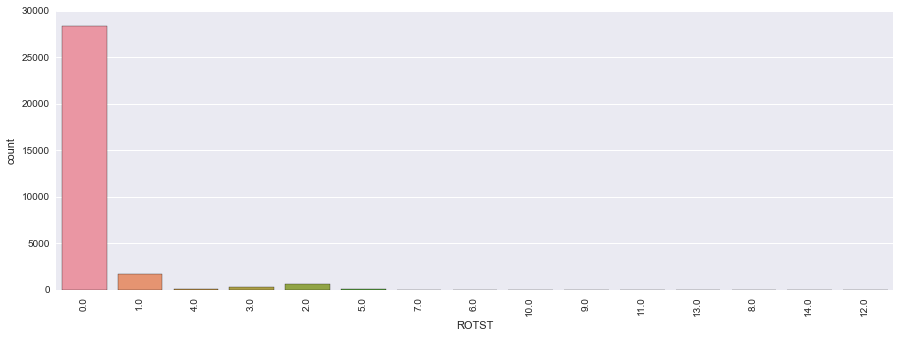

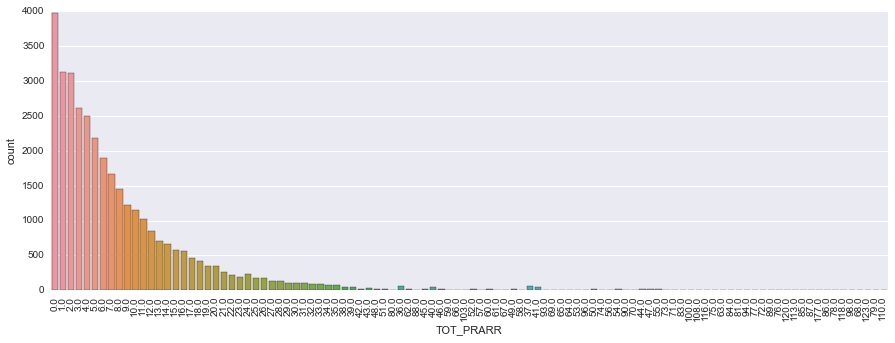

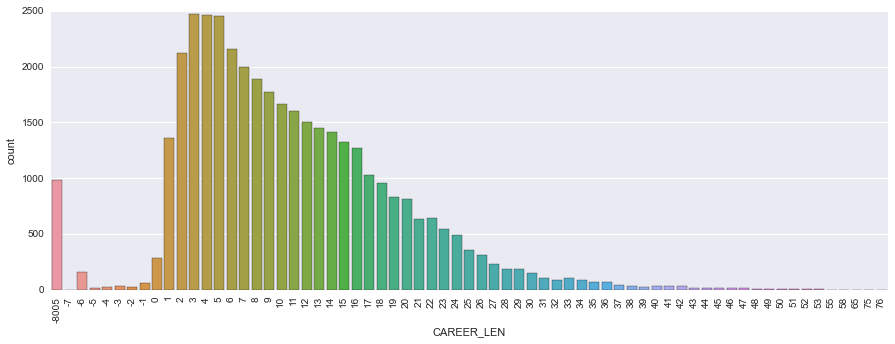

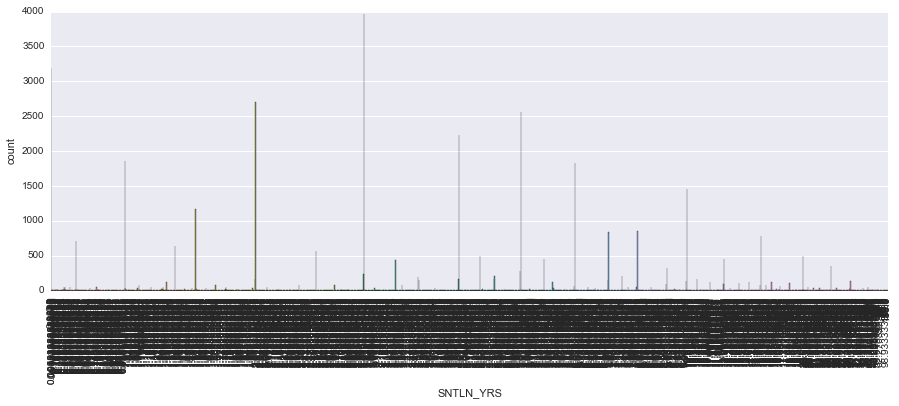

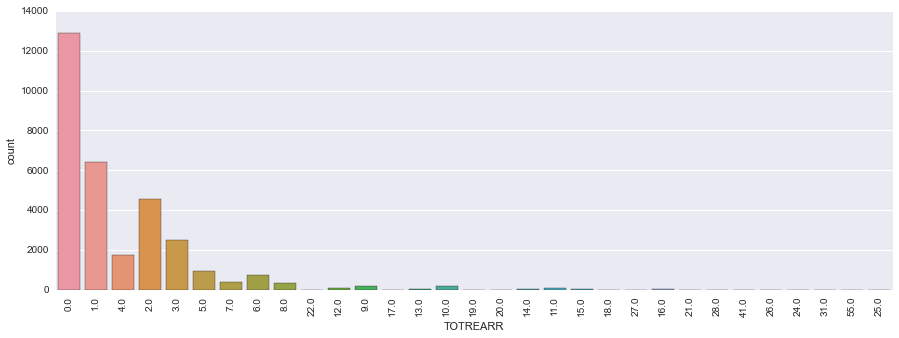

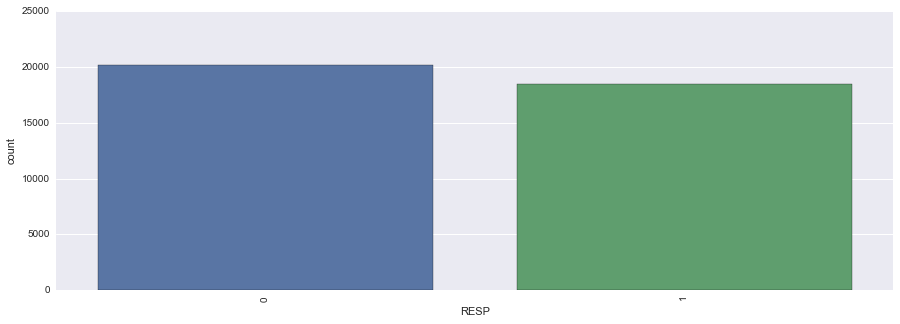

In [56]:
def make_plot(x):
    plt.figure(figsize = (15,5))
    sns.countplot(sorted(df2[x]))
    plt.xticks(rotation = 90)
    plt.xlabel(x)
    plt.show()

for x in df2.columns.values.tolist():
    make_plot(x)

###Exploring distributions of certain features

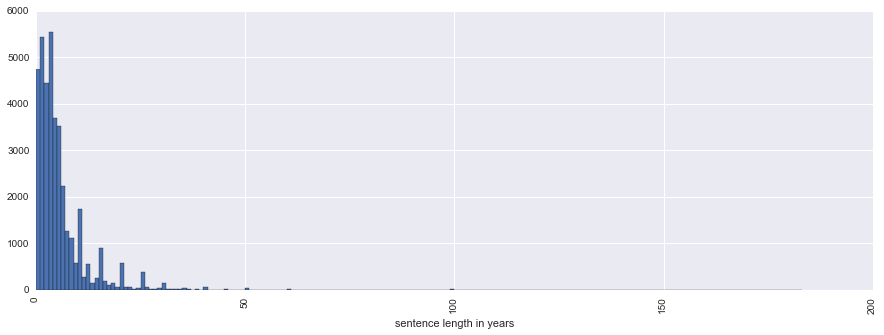

In [142]:
plt.figure(figsize = (15,5))
plt.hist(df2.SNTLN_YRS, bins=np.arange(min(df2.SNTLN_YRS), max(df2.SNTLN_YRS) + 1, 1))
plt.xticks(rotation = 90)
plt.xlabel("sentence length in years")
plt.show()

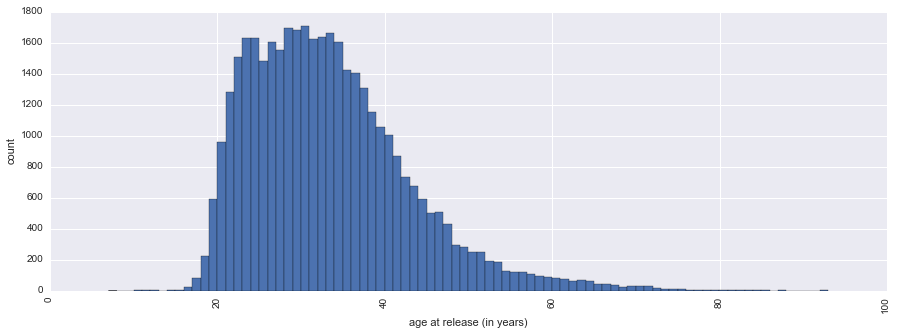

In [26]:
plt.figure(figsize = (15,5))
plt.hist(df2.RELAGE, bins=np.arange(min(df2.RELAGE), max(df2.RELAGE) + 1, 1))
plt.xlabel('age at release (in years)')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

In [46]:
df2.isnull().sum()

CASENUM          0
YEAROB1         11
SEX1             0
RACE1            0
ETHNIC1          0
RELTYP           0
NFRCTNS          0
DRUGAB           0
DRUGTRT          0
ALCTRT           0
SEXTRT           0
EDUCAT           0
VOCAT            0
STATE            0
DFM              0
DDMV             0
DFIR             0
DCDV             0
DEAD             0
SMPOFF5          0
RELAGE          51
RLAGE            0
SNTLN            0
TMSRV            0
PRIR          4827
PPRID            0
POTST         4828
A001CNT          0
A001YR           0
A001MO           0
A001ST           0
A001FM1          0
A001DSP1         0
A001DMV1         0
A001FIR1         0
A001CDV1         0
REARR          977
RCNVCT           0
RCNFIN           0
RPRS             0
RPRSITV          0
ROTST         7294
TOT_PRARR     4828
CAREER_LEN       0
SNTLN_YRS        0
TOTREARR      7294
RESP             0
dtype: int64

###Explore differences in rearrests vs. not rearrested

In [11]:
df2.groupby('RESP').mean()
#those rearrested are younger, were given shorter sentences, had more prior arrests, were arrested for fewer things(?) on their first offence, 

,CASENUM,YEAROB1,DRUGTRT,ALCTRT,SEXTRT,EDUCAT,VOCAT,RELAGE,SNTLN,TMSRV,...,RCNFIN,RPRS,ROTST,PCTSRV,AGE_FIRST_OFF,TOT_PRARR,CAREER_LEN,SNTLN_YRS,TOTREARR,TREATMENT
RESP,,,,,,,,,,,,,,,,,,,,,
0,1617.548074,1959.142219,0.024743,0.057222,0.010909,0.193336,0.138394,34.903097,64.472167,31.716404,...,43.231368,212.620568,0.000000,1.561802e+08,24.233501,6.020992,10.839544,5.372681,0.000000,0.243566
1,1639.353795,1962.386583,0.014358,0.013274,0.000542,0.171046,0.136696,31.598675,63.852809,23.140920,...,0.746925,0.380723,0.292843,1.575917e+05,21.093646,9.932600,10.875285,5.321067,2.919543,0.192664


In [12]:
df3 = df2.groupby('AGE_FIRST_OFF').mean()
df3.TOTREARR.to_csv('data.tsv', sep='\t', na_rep = 0)
df3.TOTREARR

AGE_FIRST_OFF
16    2.492593
17    2.208153
18    2.178267
19    2.037926
20    1.774652
21    1.657002
22    1.509706
23    1.464744
24    1.313622
25    1.204573
26    1.318966
27    1.103448
28    1.137795
29    1.125514
30    1.027149
31    0.926702
32    0.826471
33    0.663366
34    0.650980
35    0.666667
36    0.904167
37    0.689189
38    0.873626
39    0.506667
40    1.090226
41    0.461538
42    0.475000
43    0.444444
44    0.557522
45    0.318182
        ...   
50    0.736842
51    0.195122
52    0.193548
53    0.133333
54    0.083333
55    0.181818
56    0.258065
57    0.560000
58    0.565217
59    0.277778
60    0.111111
61    0.222222
62    1.142857
63    0.230769
64    0.444444
65    0.571429
66    0.000000
67    0.142857
68    0.100000
69    0.111111
70    0.000000
71    0.000000
72    0.000000
73    0.000000
74    0.000000
75    1.000000
76    0.000000
77    0.000000
78         NaN
79    0.000000
Name: TOTREARR, dtype: float64

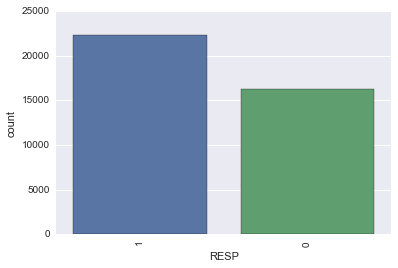

In [186]:
sns.countplot(df2.RESP)
plt.xticks(rotation = 90)
plt.show()

###Baseline predictor

In [225]:
def always_reoffend(x):
    return [1] * len(x)
y_pred = always_reoffend(x_test)

print "Baseline = %0.2f" % accuracy_score(y_test, y_pred) 

Baseline = 0.59


###Set up selected features, train/test split and scale

In [31]:
#y, X = dmatrices('RESP ~ SEX1 + RACE1+ETHNIC1+RELTYP+NFRCTNS+C(TREATMENT)+ADTYP+SMPOFF5+np.log(RELAGE)+np.log(TMSRV+1)+np.log(TOT_PRARR+1)+A001FM1+np.log(AGE_FIRST_OFF)+PCTSRV', data=df2, return_type='dataframe')
#y, X = dmatrices('RESP ~ np.log(RELAGE) + TMSRV + np.log(TOT_PRARR+1) + np.log(PCTSRV) + np.log(AGE_FIRST_OFF) + SMPOFF5+ A001FM1 + C(TREATMENT)', data=df2, return_type='dataframe')
#y, X = dmatrices('RESP ~ RELAGE + TMSRV + TOT_PRARR', data=df2, return_type='dataframe')
y, X = dmatrices('RESP ~ TOT_PRARR', data=df2, return_type='dataframe')


y = np.ravel(y)

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=7)

std_scale = preprocessing.StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

###Train model and evaluate test accuracy

In [34]:
def test_model(name, main_model):
    model = main_model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    #print name, "accuracy score:", accuracy_score(y_test, model.predict(x_test))
    
    print "Classification report:\n", classification_report(y_test, model.predict(x_test))
    print name, "confusion matrix:\n", confusion_matrix(y_test, model.predict(x_test))


#test_model("KNN", KNeighborsClassifier())
#test_model("Logistic Regression", LogisticRegression())
#test_model("Gaussian Naive Bayes", GaussianNB())
test_model("SVM Classifier", SVC())
#test_model("Decision Tree", DecisionTreeClassifier())
#test_model("Random Forest", RandomForestClassifier())

Classification report:
             precision    recall  f1-score   support

        0.0       0.63      0.41      0.50      3840
        1.0       0.62      0.80      0.70      4609

avg / total       0.62      0.62      0.61      8449

SVM Classifier confusion matrix:
[[1578 2262]
 [ 936 3673]]


In [ ]:
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [65]:
cm = confusion_matrix(y_test, model.predict(x_test))
print cm

[[1578 2262]
 [ 936 3673]]


In [68]:
cm_df = pd.DataFrame(np.hstack((cm[0],cm[1])))
cm_df

,0
0,1578
1,2262
2,936
3,3673


Feature ranking:
1. feature 48 (0.174597)
2. feature 49 (0.157136)
3. feature 50 (0.132010)
4. feature 52 (0.123517)
5. feature 51 (0.110483)
6. feature 46 (0.023397)
7. feature 47 (0.022162)
8. feature 15 (0.017747)
9. feature 43 (0.017087)
10. feature 45 (0.016246)
11. feature 22 (0.014141)
12. feature 40 (0.014084)
13. feature 10 (0.013999)
14. feature 2 (0.013132)
15. feature 21 (0.012898)
16. feature 5 (0.011784)
17. feature 6 (0.011749)
18. feature 12 (0.010017)
19. feature 7 (0.009742)
20. feature 37 (0.009425)
21. feature 41 (0.009197)
22. feature 30 (0.008258)
23. feature 9 (0.007708)
24. feature 32 (0.006866)
25. feature 13 (0.006851)
26. feature 34 (0.006794)
27. feature 4 (0.005744)
28. feature 16 (0.005708)
29. feature 31 (0.005153)
30. feature 33 (0.004685)
31. feature 14 (0.003750)
32. feature 26 (0.002729)
33. feature 28 (0.001793)
34. feature 27 (0.001783)
35. feature 29 (0.001778)
36. feature 35 (0.001656)
37. feature 1 (0.001378)
38. feature 39 (0.001218)
39. feature

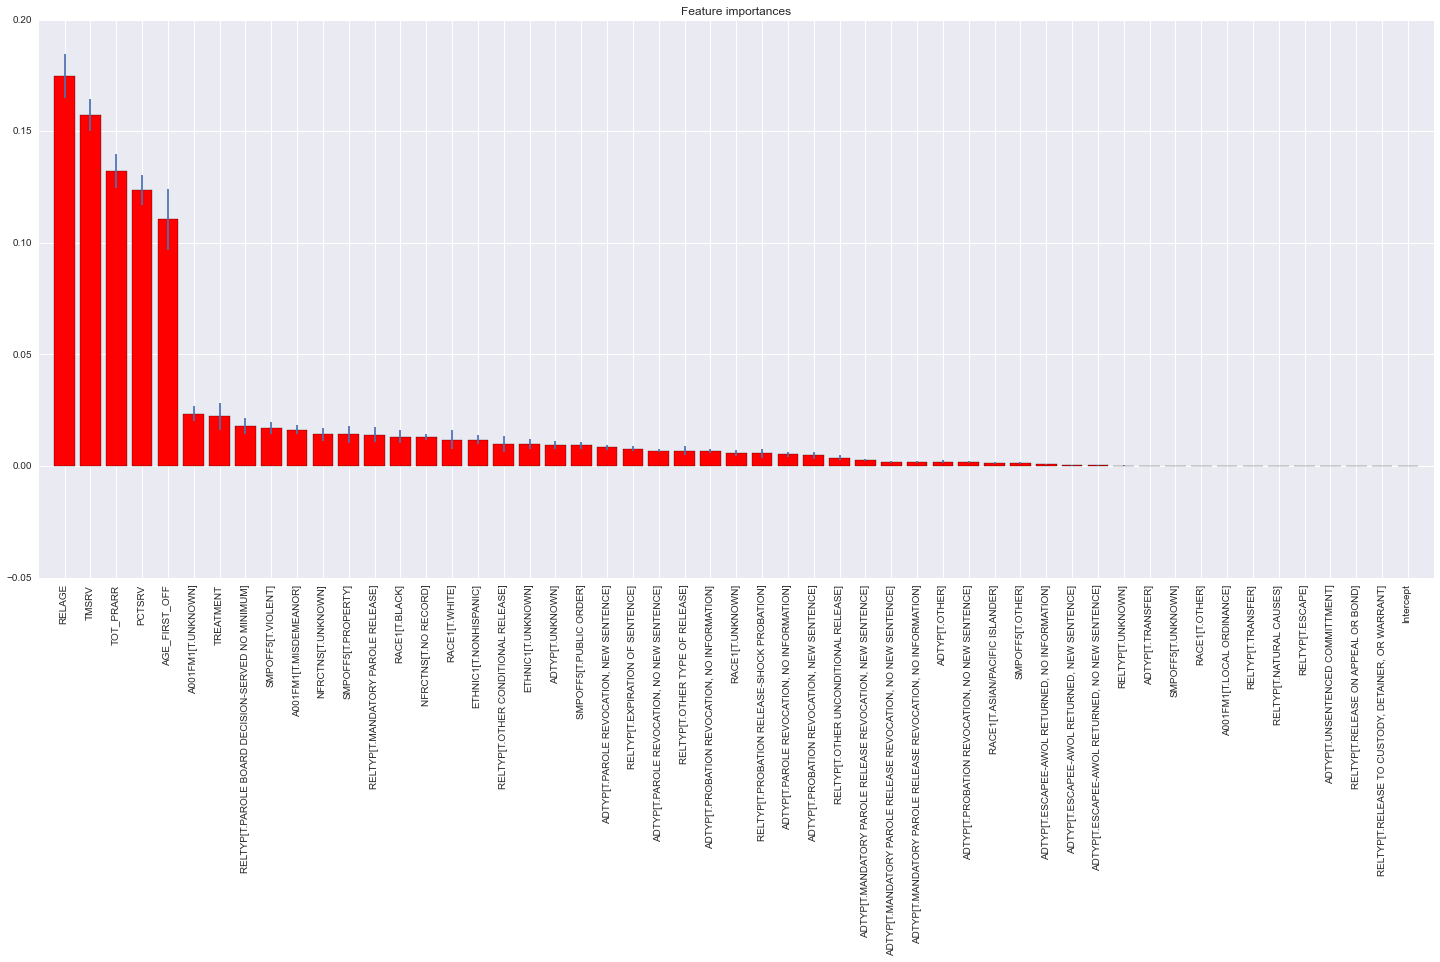

In [182]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(len(indices)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize = (25,10))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), X.columns[indices], rotation = 90)
plt.xlim([-1, len(indices)])
plt.show()

###Look at train accuracy (overfit?)

In [186]:
def train_model(name, main_model):
    model = main_model()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    print name, "accuracy score:", accuracy_score(y_train, model.predict(x_train))

#train_model("KNN", KNeighborsClassifier)
#train_model("Logistic Regression", LogisticRegression)
#train_model("Gaussian Naive Bayes", GaussianNB)
train_model("SVM Classifier", SVC)
#train_model("Decision Tree", DecisionTreeClassifier)
#train_model("Random Forest", RandomForestClassifier)

KNN accuracy score: 0.779308934778
Logistic Regression accuracy score: 0.689674913106
Gaussian Naive Bayes accuracy score: 0.569290533633
SVM Classifier accuracy score: 0.735718666939
Decision Tree accuracy score: 1.0
Random Forest accuracy score: 0.987200981394


### Look at ROC curves

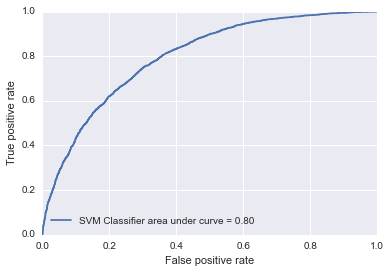

In [45]:
def curves(name, classifier):
    probas_ = classifier.fit(x_train, y_train).predict_proba(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = "%s area under curve = %0.2f" 
             % (name, roc_auc_score(y_test, probas_[:, 1])))
    plt.legend(loc = "best")
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    #plt.title("ROC curves")
    
#curves("KNN", KNeighborsClassifier())
#curves("Logistic Regression", LogisticRegression())
#curves("Gaussian Naive Bayes", GaussianNB())
curves("SVM Classifier", SVC(probability = True))
#curves("Decision Tree", DecisionTreeClassifier())
#curves("Random Forest", RandomForestClassifier())

###Look at Logistic Regression coefficients for each feature

In [279]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[0.0]
1,SEX1[T.MALE],[0.106376074109]
2,SEX1[T.UNKNOWN],[0.0129882363765]
3,RACE1[T.ASIAN/PACIFIC ISLANDER],[-0.064442102417]
4,RACE1[T.BLACK],[0.080060436919]
5,RACE1[T.OTHER],[0.00431689283981]
6,RACE1[T.UNKNOWN],[-0.142538288219]
7,RACE1[T.WHITE],[-0.157689251291]
8,ETHNIC1[T.NONHISPANIC],[-0.0498979997428]
9,ETHNIC1[T.UNKNOWN],[-0.272006959981]


In [73]:
data_df = df2[['CASENUM', 'AGE_FIRST_OFF','TOT_PRARR','SNTLN_YRS' , 'TMSRV', 'RELAGE', 'RESP']][0:100]
data_df.TMSRV = data_df.TMSRV/12

In [23]:
data_df.to_csv('cars.csv', sep=',', na_rep = 0, index = False, header = ['name','Age at first offence','Total Prior Arrests','Sentence Length (yrs)','Time Served (yrs)','Age at release (1994)','Rearrested?'])

ValueError: Writing 3 cols but got 7 aliases

In [1]:
data_df.to_csv('cars.csv', sep=',', na_rep = 0, index = False, header = ['name','Age at first offence','Total Prior Arrests','Sentence Length (yrs)','Time Served (yrs)','Age at release (1994)','Rearrested?'])

NameError: name 'df2' is not defined

In [21]:
data_df = df2[['PRIR', 'AGE_FIRST_OFF','RESP']]

data_df.to_csv('chal.tsv', sep='\t', na_rep = 0, index = False, header = ["sepalLength", "sepalWidth", "species"])